In [1]:
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import pandas as pd 
from pandas import json_normalize 
import numpy as np 
import requests

In [6]:
events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/3869684.json')
events= events.json()
events 

df=json_normalize(events, sep = "_")

In [3]:
pd.set_option("display.max.columns",None)

df.head(5)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,under_pressure,duel_type_id,duel_type_name,out,clearance_aerial_won,clearance_head,clearance_body_part_id,clearance_body_part_name,ball_recovery_recovery_failure,pass_cross,counterpress,pass_inswinging,pass_technique_id,pass_technique_name,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_outcome_id,goalkeeper_outcome_name,pass_aerial_won,foul_won_defensive,off_camera,pass_switch,pass_assisted_shot_id,pass_goal_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_freeze_frame,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_position_id,goalkeeper_position_name,shot_one_on_one,pass_shot_assist,goalkeeper_end_location,interception_outcome_id,interception_outcome_name,duel_outcome_id,duel_outcome_name,shot_first_time,pass_through_ball,pass_no_touch,dribble_outcome_id,dribble_outcome_name,clearance_right_foot,block_offensive,goalkeeper_body_part_id,goalkeeper_body_part_name,clearance_left_foot,shot_aerial_won,foul_committed_advantage,foul_won_advantage,dribble_nutmeg,dribble_overrun,injury_stoppage_in_chain,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,clearance_other,pass_deflected,pass_outswinging,bad_behaviour_card_id,bad_behaviour_card_name
0,cc70f393-5ff4-45a2-9b07-ea02889171f2,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,785,Croatia,1,Regular Play,785,Croatia,4231.0,"[{'player': {'id': 16531, 'name': 'Dominik Liv...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1fbc32f2-2e9f-4f45-95bd-0ec1676619ca,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,785,Croatia,1,Regular Play,788,Morocco,433.0,"[{'player': {'id': 6785, 'name': 'Yassine Boun...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9c17c99c-fd20-4631-b46b-57ce346de3a4,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,785,Croatia,1,Regular Play,785,Croatia,NaN,NaN,[98c3d500-df1a-448c-be09-8149920ca0c4],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,98c3d500-df1a-448c-be09-8149920ca0c4,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,785,Croatia,1,Regular Play,788,Morocco,NaN,NaN,[9c17c99c-fd20-4631-b46b-57ce346de3a4],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
england_passes = df.loc[(df['type_name']== 'Pass') & (df['team_name'] == "Croatia")]

Text(0.5, 1.0, 'Gvardiol Passes')

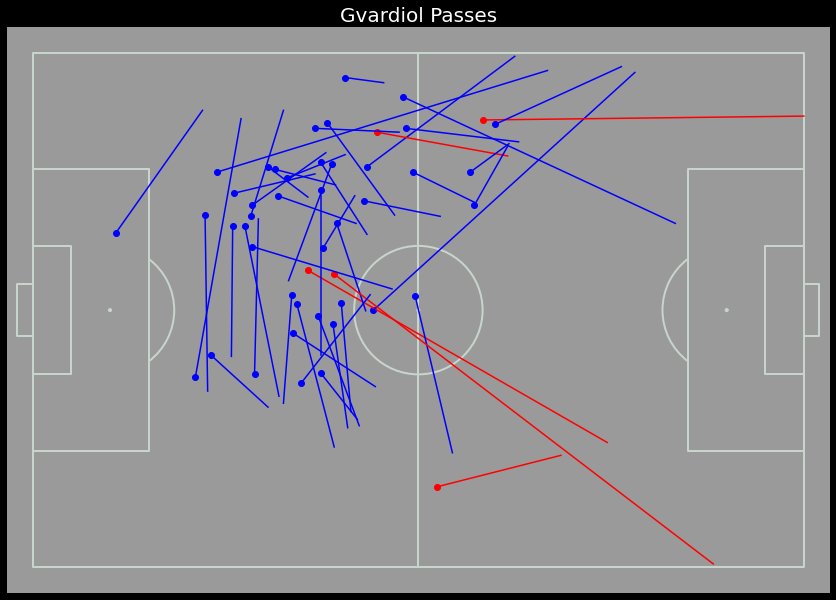

In [10]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#9A9A9A',
              line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

for x in range(len(england_passes['id'])):
    if (england_passes['player_name'].iloc[x] == 'Joško Gvardiol') & (england_passes['period'].iloc[x] ==1):
        
        if any([england_passes['pass_outcome_name'].iloc[x] == 'Incomplete', england_passes['pass_outcome_name'].iloc[x] == 'Out',
                england_passes['pass_outcome_name'].iloc[x] == 'Unknown', england_passes['pass_outcome_name'].iloc[x] == 'Pass Offside',
                england_passes['pass_outcome_name'].iloc[x] == 'Injury Clearance']):
            plt.plot((england_passes['location'].iloc[x][0], england_passes['pass_end_location'].iloc[x][0]),\
                    (england_passes['location'].iloc[x][1], england_passes['pass_end_location'].iloc[x][1]), color='red')
            plt.scatter(england_passes['location'].iloc[x][0], england_passes['location'].iloc[x][1], color='red')
        else:
            plt.plot((england_passes['location'].iloc[x][0], england_passes['pass_end_location'].iloc[x][0]),\
                    (england_passes['location'].iloc[x][1], england_passes['pass_end_location'].iloc[x][1]), color='blue')
            plt.scatter(england_passes['location'].iloc[x][0], england_passes['location'].iloc[x][1],color='blue')

plt.title('Gvardiol Passes', color='white', size=20)



In [11]:
df_pass=df.loc[(df['type_name']== 'Pass') & (df['team_name']== "Croatia") & (df['player_name']== 'Joško Gvardiol')]

location_xy = df_pass.location.apply(pd.Series)

location_xy.columns=['x', 'y']

In [12]:
location_xy.dropna(inplace = True)

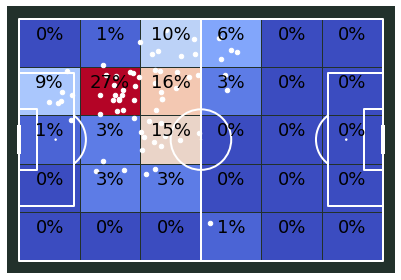

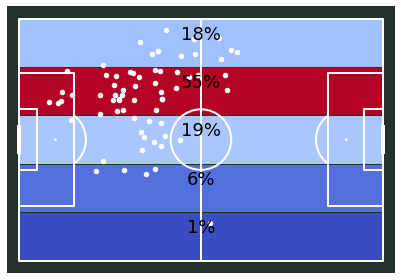

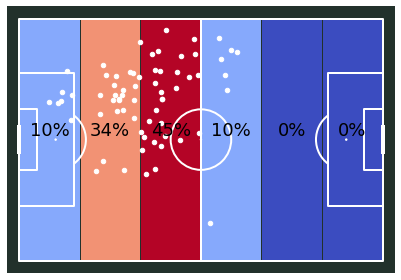

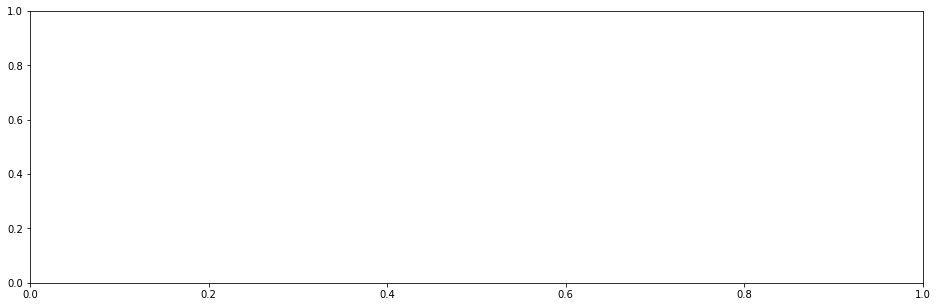

In [13]:
# Initialize the pitch object
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='white')

# Create individual pitch plots using pitch.draw
pitch1, ax1 = pitch.draw()
pitch2, ax2 = pitch.draw()
pitch3, ax3 = pitch.draw()

# Define the bins
bins = [(6, 5), (1, 5), (6, 1)]

# Plot data for each bin
for i, bin in enumerate(bins):
    bin_statistic = pitch.bin_statistic(location_xy.x, location_xy.y, statistic='count', bins=bin)
    
    if i == 0:
        pitch.heatmap(bin_statistic, ax=ax1, cmap='coolwarm', edgecolors='#22312b')
        pitch.scatter(location_xy.x, location_xy.y, c='white', s=20, ax=ax1)
        bin_statistic['statistic'] = (pd.DataFrame((bin_statistic['statistic'] / bin_statistic['statistic'].sum()))
                                      .applymap(lambda x: '{:.0%}'.format(x))
                                      .values)
        pitch.label_heatmap(bin_statistic, color='black', fontsize=18, ax=ax1, ha='center', va='bottom')
    elif i == 1:
        pitch.heatmap(bin_statistic, ax=ax2, cmap='coolwarm', edgecolors='#22312b')
        pitch.scatter(location_xy.x, location_xy.y, c='white', s=20, ax=ax2)
        bin_statistic['statistic'] = (pd.DataFrame((bin_statistic['statistic'] / bin_statistic['statistic'].sum()))
                                      .applymap(lambda x: '{:.0%}'.format(x))
                                      .values)
        pitch.label_heatmap(bin_statistic, color='black', fontsize=18, ax=ax2, ha='center', va='bottom')
    elif i == 2:
        pitch.heatmap(bin_statistic, ax=ax3, cmap='coolwarm', edgecolors='#22312b')
        pitch.scatter(location_xy.x, location_xy.y, c='white', s=20, ax=ax3)
        bin_statistic['statistic'] = (pd.DataFrame((bin_statistic['statistic'] / bin_statistic['statistic'].sum()))
                                      .applymap(lambda x: '{:.0%}'.format(x))
                                      .values)
        pitch.label_heatmap(bin_statistic, color='black', fontsize=18, ax=ax3, ha='center', va='bottom')

# Set the title for the overall figure
fig = plt.subplots(figsize=(16, 5))




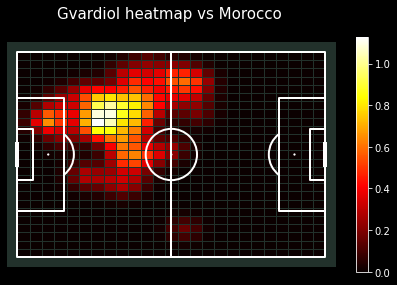

In [14]:
import matplotlib.pyplot as plt 
from scipy.ndimage import gaussian_filter 
plt.style.use('dark_background')

pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='white')

fig,ax = pitch.draw()

bin_statistic=pitch.bin_statistic(location_xy.x,location_xy.y,statistic='count',bins=(25,25))
bin_statistic['statistic']=gaussian_filter(bin_statistic['statistic'],1)
pcm=pitch.heatmap(bin_statistic,ax=ax,cmap='hot',edgecolors='#22312b')
cbar=fig.colorbar(pcm,ax=ax)
title=fig.suptitle('Gvardiol heatmap vs Morocco',x=0.4,y=0.98,fontsize=15)